In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn

In [62]:
Auto = pd.read_csv('../Data/Auto.csv', na_values='?').dropna()

In [63]:
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [64]:
# I prefer this method of splitting training/test data because it is so intuitive, but note that you are not guaranteed
# to get a true 50/50 split on the data, also a nice example of boolean indexing a pandas data frame
msk = np.random.rand(len(Auto)) < 0.5 #since they
train = Auto[msk]
test = Auto[~msk]
print(len(train), len(test))

206 186


In [65]:
# if you want a guaranteed split
import random
n = len(Auto)
train_msk = random.sample(range(n), int(n/2))
test_msk = set(range(n)) - set(train_msk)
train = Auto.iloc[train_msk]
test = Auto.iloc[list(test_msk)]

In [66]:
#and a way to check that you have separate indexes
sum(1 for ix in train.index if ix in test.index)

0

In [75]:
# for left side of Figure 5.2
degrees = list(range(1,11))
x_train = train['horsepower'].values
y_train = train['mpg'].values
x_test= test['horsepower'].values
y_test = test['mpg'].values
test_errors = {}
for degree in degrees:
    d = np.polyfit(x_train,y_train,degree)
    f = np.poly1d(d)
    y_hat = f(x_test)
    error = ((y_test-y_hat)**2).mean()
    test_errors[degree] = error
    

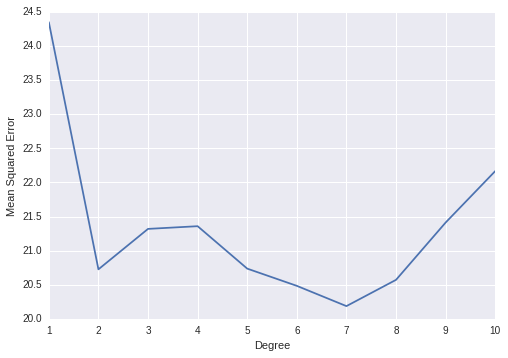

In [74]:
# interesting that we get a different shape for this one, probably jus t
plt.plot(degrees, [test_errors[d] for d in degrees])
plt.xlabel('Degree')
plt.ylabel("Mean Squared Error")

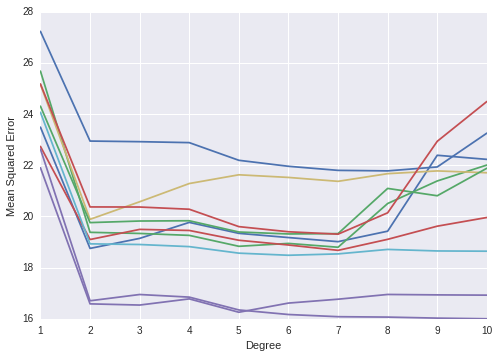

In [76]:
# Right side of figure 5.2
test_errors = {}
for _ in range(10):
    errors = []
    msk = np.random.rand(len(Auto)) < 0.5 #since they
    train = Auto[msk]
    test = Auto[~msk]
    x_train = train['horsepower'].values
    y_train = train['mpg'].values
    x_test= test['horsepower'].values
    y_test = test['mpg'].values
    for degree in degrees:
        d = np.polyfit(x_train,y_train,degree)
        f = np.poly1d(d)
        y_hat = f(x_test)
        errors.append(((y_test-y_hat)**2).mean())
    plt.plot(degrees, errors)
plt.xlabel('Degree')
plt.ylabel('Mean Squared Error')

In [77]:
# from Ch5 Lab
